# SVM и его ядра
__Суммарное количество баллов: 10__

In [30]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm

In [11]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [13]:
blobs = pd.read_csv('hw7_data/blobs2.csv')
X = blobs.drop(columns='label').to_numpy()
y = blobs['label'].to_numpy()

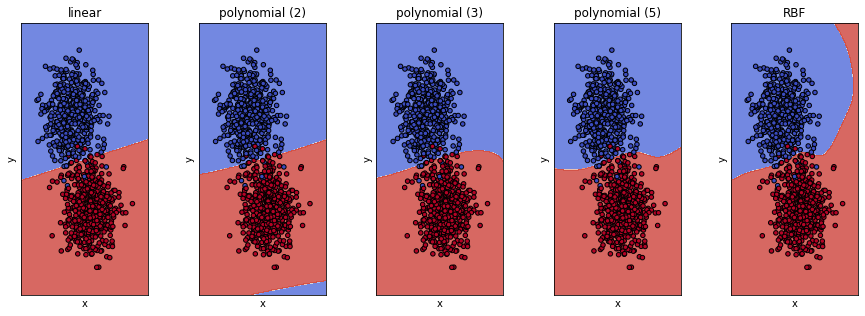

In [17]:
models = (svm.SVC(kernel='linear'),
          svm.SVC(kernel='poly', degree=2),
          svm.SVC(kernel='poly', degree=3),
          svm.SVC(kernel='poly', degree=5),
          svm.SVC(kernel='rbf', gamma=0.7))
models = (clf.fit(X, y) for clf in models)
titles = ('linear',
          'polynomial (2)',
          'polynomial (3)',
          'polynomial (5)',
          'RBF')

fig, sub = plt.subplots(1, 5, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [27]:
scores = {'accuracy': accuracy_score, 'recall': recall_score, 'precision': precision_score}

In [21]:
cancer = pd.read_csv('hw7_data/cancer.csv')
X = blobs.drop(columns='label').to_numpy()
y = blobs['label'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [34]:
%%time
model = svm.SVC(kernel='rbf', gamma=0.7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
for score, func in scores.items():
    print(f'{score}: {func(y_test, y_pred):.3f}')

accuracy: 0.995
recall: 1.000
precision: 0.990
CPU times: user 13.6 ms, sys: 0 ns, total: 13.6 ms
Wall time: 12 ms


In [33]:
%%time
L = lightgbm.LGBMClassifier()
L.fit(X_train, y_train)
y_pred = L.predict(X_test)
for score, func in scores.items():
    print(f'{score}: {func(y_test, y_pred):.3f}')

accuracy: 0.950
recall: 0.947
precision: 0.947
CPU times: user 378 ms, sys: 3.68 ms, total: 382 ms
Wall time: 131 ms


In [35]:
spam = pd.read_csv('hw7_data/spam.csv')
X = blobs.drop(columns='label').to_numpy()
y = blobs['label'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [43]:
%%time
model = svm.SVC(kernel='rbf', gamma=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
for score, func in scores.items():
    print(f'{score}: {func(y_test, y_pred):.3f}')

accuracy: 0.980
recall: 0.972
precision: 0.991
CPU times: user 13.4 ms, sys: 3.95 ms, total: 17.4 ms
Wall time: 16 ms


In [44]:
%%time
L = lightgbm.LGBMClassifier()
L.fit(X_train, y_train)
y_pred = L.predict(X_test)
for score, func in scores.items():
    print(f'{score}: {func(y_test, y_pred):.3f}')

accuracy: 0.975
recall: 0.963
precision: 0.991
CPU times: user 489 ms, sys: 3.79 ms, total: 493 ms
Wall time: 163 ms


**SVM** работает быстрее при чуть более высоких показателях точности, чем **Random Forest**